# Dark Matter Mass in a distant Galaxy

Galaxies follow a well-modelled distribution of stars and their masses as a function of distance from the galaxy centre. These together create a gravitational potential of the galaxy in which the stars revolve. However, observed stellar revolution rates are in stark disagreement with calculated values. This discrepancy can be attributed to the presence of dark matter halo around the galaxy, which creates a potential that fits with the observed velocities.

Your task in this assignment is to estimate the amount of dark matter in the halo of a distant galaxy, KriGal. 

## Finding the radius-velocity curve

The following file(darkmatter.csv) contains observation data of the stars, a small section of which belong to the galaxy KriGal. Open the file and take a look to get an idea of what observations were made. Such data for stars this far are in practice impossible to measure with such precision, but were made possible for the first time in the history of space observation with KIT (Krittika's Incredible Telescope).

It is known the galaxy's centre has (RA, Dec) = $(140.76398^0, 75.5344^0)$

Open the CSV file, find the relative RA/Dec difference of each star w.r.t. the galaxy's centre and convert all data to SI units - would be handy later on. 


In [35]:
#code
%matplotlib inline

import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
pi = 3.14159

centre_ra = 140.76398 *(pi/180)
centre_dec = 75.5344 *(pi/180)

c = 3e8
df = pd.read_csv('darkmatter.csv')
arr = df.to_numpy()

print(arr.shape)


arr[:, 0] *= (pi/180)
arr[:, 0] -= centre_ra

arr[:, 1] *= (pi/180)

arr[:, 1] -=centre_dec

(900, 4)


Assume the galaxy is 3500 kpc (kiloparsecs) away and the centre of galaxy moves according to Hubble's law (H = $70$ km/s/Mpc). Note that the redshift $z$ is related to the radial velocity of any object as

$$ z = \sqrt{\frac{c+v}{c-v}} - 1$$
where $c$ = speed of light, and $v$ = velocity of object, taken positive when object moves away from us.

Also 1 parsec = $3.083 \times 10^{16}$ metres

Using this, find the relative radial velocities of the stars w.r.t. the centre of galaxy.


In [36]:
#code
z = np.array(arr[:, 3])
v_r = c*(np.square(z+1)-1)/(np.square(z+1) + 1)
v_r -= (3500*1000)*(70*1000/1000000)     #in m/s
print(v_r)

[ 122971.00577367 -387570.84684166 -113742.43086916 -105330.58257423
 -151832.51169656   25769.58417833 -398736.03940086 -128372.71858643
   42801.32355049 -122512.58131364   49242.08336299 -146560.20344512
  -10562.23493166  -47391.9835701  -161862.57142023 -141238.08987633
  -97518.1012467   -48098.76926024 -301143.90429738 -100813.22337873
  -16828.13686632  -75292.90032645 -123224.89838542 -347659.29771096
  -70308.82040856 -156624.21270672 -108621.02298194 -413916.68427718
  -63953.72302626 -205067.64232063 -341240.58087586   83860.33171291
 -445357.09867647 -199452.58181587  -94808.80169864 -392323.48663604
 -328994.24940668 -232516.08151493   11133.04818861 -117812.97469166
 -184955.90407241   -2903.11008477 -134522.83051658  -47600.24426272
  -50854.65594447   10211.11399605  148873.92416566 -122037.41182027
 -272724.58138291 -448847.51850637 -163778.72999675  -97535.59699054
 -122808.75713222 -140286.35820999 -157852.88446599 -133870.38703821
  148041.96860968  -93699.02230287

Use the previous information to find the tangential velocities of the stars. 

Assume the stars move in perfectly circular orbits and we view the galaxy edge-on i.e. to us the star trajectories appear like line segments.

In [37]:
#code


v_t = np.array(arr[:, 2])
v_t /= (1000*3600)
v_t *= (pi/180)

v_t *= 3500*1000*3.083*1e16

for i in range(arr.shape[0]) :
    delta_ra = arr[i][0]
    delta_dec = arr[i][1]
    angle = math.atan(delta_dec/ delta_ra)
    #print(delta_dec, delta_ra, math.cos(angle))
    v_t[i] = math.sqrt( (v_t[i]*math.cos(angle)*math.cos(arr[i][1] + centre_dec))**2  + (v_t[i]*math.sin(angle))**2  )
    

v_t/= (365.25 * 24* 3600)
print(v_t)


[2.59902939e+04 1.82189550e+07 3.19761456e+04 1.27096306e+07
 1.71484795e+07 4.19523126e+04 5.54977288e+07 1.10735084e+04
 3.77887701e+04 1.54081891e+07 3.58254753e+04 9.88205755e+03
 2.47176348e+04 2.08205980e+07 9.64079545e+06 2.10408763e+07
 2.08150331e+04 4.14198905e+07 4.93661098e+07 3.08577827e+04
 4.50700421e+04 1.48768015e+04 5.39525173e+07 1.97764333e+07
 2.22507795e+04 1.05772678e+07 2.81785375e+04 3.28096075e+07
 2.74518122e+07 2.50213527e+07 3.33286371e+07 3.81328298e+04
 5.73929010e+06 4.19748075e+07 5.25615143e+07 1.60088510e+07
 1.21949979e+07 1.87172097e+07 1.29878941e+04 2.56250998e+04
 3.62595266e+07 4.02344781e+04 2.26032758e+07 2.70323204e+07
 3.88237225e+04 2.01380673e+04 1.02351754e+04 2.16281934e+07
 4.99733044e+07 1.64847661e+07 6.33347479e+06 2.60949343e+06
 5.04782412e+02 6.81475276e+07 2.25599590e+07 1.64641838e+07
 1.24498069e+04 3.06513363e+04 1.81953262e+07 1.18066313e+07
 6.69778693e+03 9.81255436e+06 4.24526566e+07 3.64126256e+04
 1.80120951e+07 1.178987

Now find the angular separation from galaxy centre to each star and use that to find the tangential separation (in length units) from the galaxy centre.

In [38]:
#code

psi = np.square(np.sin(arr[:, 1]/2)) + np.cos(arr[:, 1] + centre_dec)*np.cos(centre_dec)*np.square(np.sin(arr[:, 0]/2))
psi = 2*np.arctan2(np.sqrt(psi), np.sqrt(1-psi))
#print(psi)

psi2 = np.arccos(np.sin(centre_dec)*np.sin(arr[:,1]+centre_dec) + np.cos(centre_dec)*np.cos(centre_dec + arr[:,1])*np.cos(arr[:,0]))

print(psi2)

d_t = 3500*1000*3.086*1e16 * psi
#print(d_t)

[6.48161146e-03 1.02154574e-01 3.05716259e-03 6.52729744e-02
 7.47732740e-02 8.66775584e-04 5.02354090e-02 1.93626350e-03
 6.44474227e-04 9.68879421e-02 8.77013283e-04 6.46263077e-03
 6.48991880e-05 2.35518344e-01 2.81988686e-01 2.13453705e-01
 9.12919888e-04 2.71140001e-01 1.09073615e-01 1.82964559e-03
 6.89446180e-04 4.75330541e-04 2.85671293e-01 1.15478564e-01
 5.48466859e-04 1.97178038e-01 2.84894042e-03 2.17569063e-01
 1.97614394e-01 2.19213277e-01 1.29924492e-01 3.87351770e-03
 9.86667029e-02 2.13682953e-01 2.05988242e-01 6.55055913e-02
 8.00116944e-02 1.11745040e-01 3.75523483e-05 3.51500872e-03
 8.19514000e-02 1.15906937e-04 1.86275117e-01 1.56306036e-01
 2.46604793e-03 4.04223600e-05 5.91757698e-03 1.31099863e-01
 2.50425455e-01 1.97724534e-01 2.18424753e-01 2.95709908e-01
 1.12491285e-03 2.67960776e-01 1.21248278e-01 2.34264031e-01
 7.56646554e-03 2.11104161e-03 8.22586407e-02 7.22738783e-02
 6.36387407e-05 4.93110219e-02 1.81873675e-01 4.33826362e-03
 9.85369558e-02 1.327638

Find total velocity of each star w.r.t. galaxy centre.

Using angle information obtained from velocity components (assume circular orbits) and tangential distance, find the radial distance and hence the total distance of each star w.r.t. galaxy centre.

Make a scatter plot of velocity v/s radius.

[ 1.47963782e+20 -5.18673600e+23 -9.28295211e+19 -8.50698780e+23
 -9.12160380e+23  1.52411989e+20 -7.55202864e+23 -1.80401825e+19
  6.14575267e+19 -1.31614763e+24  6.89168913e+19 -4.70657116e+19
 -1.64041720e+19 -1.11757588e+25 -1.81410359e+24 -3.43462757e+24
 -2.10469178e+19 -2.52192718e+25 -1.93125002e+24 -6.04892437e+19
 -1.99441836e+20 -1.01441398e+19 -1.35096411e+25 -7.09511536e+23
 -1.87477769e+19 -1.43825902e+24 -7.98273833e+19 -1.86272700e+24
 -9.16194600e+24 -2.88897955e+24 -1.37060362e+24  1.90244439e+20
 -1.37335996e+23 -4.85716542e+24 -1.23346153e+25 -2.88707584e+23
 -3.20339769e+23 -9.71583950e+23  4.73179283e+18 -8.25777064e+19
 -1.73529883e+24 -1.73503508e+20 -3.38060319e+24 -9.58768731e+24
 -2.03344267e+20  8.61053788e+18  4.39424772e+19 -2.50953618e+24
 -4.95628441e+24 -7.84347448e+23 -9.12326659e+23 -8.54521322e+23
 -4.99410561e+17 -1.40594993e+25 -1.87165297e+24 -3.11189735e+24
  6.87281713e+19 -7.45890565e+19 -1.51398298e+24 -2.40594866e+23
  1.59210190e+18 -1.84097

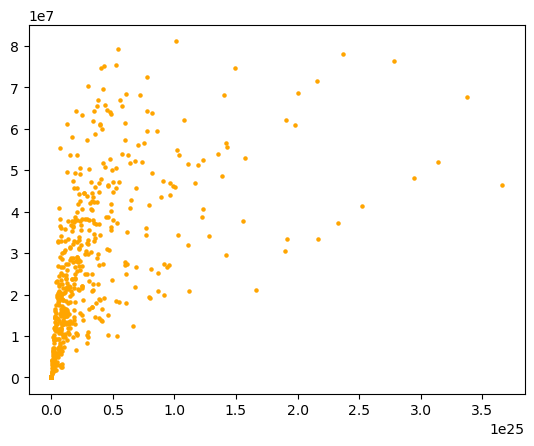

In [39]:
#code
v_total = np.sqrt(np.square(v_r) + np.square(v_t))
d_r = v_t * d_t / v_r
print(d_r)
d_total = np.sqrt(np.square(d_r) + np.square(d_t))
plt.scatter(d_total, v_total, s = 5, c = 'orange')

plt.show()

## Finding halo parameters using the curve

If you have got correctly so far, you would have got a set of points that follow what is known as the **galaxy rotation curve**, a curve that rises steeply first, curves and becomes almost constant from around midway. This rotation curve is evidence for the dark matter halo. The halo is taken to be spherical with the centre at galaxy's centre, with radial density profile given by the [Navarro-Frenk-White (NFW) profile](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile):

$$ \rho (r) = \frac{\rho_0}{\frac{r}{R_s}\left( 1 + \frac{r}{R_s}\right)^2} $$

where $R_s$ is a scale radius whose value is comparable to the radius of the galaxy (i.e. same order of magnitude).

From the density profile, find the expression for mass $M_r$ enclosed in a sphere of radius $r$ (you may include it in a handwritten page photo). Using this find the expression for velocity of a star at radius $r$. Recall that 
$$ \frac{v^2}{r} = \frac{GM_r}{r^2} $$

Once you have the velocity profile, using scipy's curve fitting function (google for syntax and uses!) find the best fit value of $R_s$. You are given that the value of $\rho_0$ is $0.02$ solar masses per cubic parsec. Again, convert it to SI units before processing.

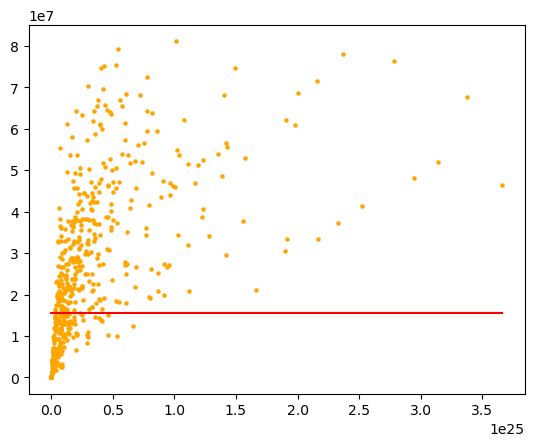

In [40]:
#code
#4pi rho R_s^3 (r/r+R)
from scipy.optimize import curve_fit
rho0 = 0.02 * (1.9885 * 1e30)/(3.086 * 1e16)**3
G = 6.67 * 1e-11
def f(r, R) : 
    v = np.sqrt(G * 4*pi*R**3*rho0*r/(r+R))
    return v
popt , pcov = curve_fit(f, d_total, v_total, p0 = [3.086*1e16 * 1000 ])
print(popt)
plt.scatter(d_total, v_total, s = 5, c = 'orange')
R_opt = popt[0]

x_data = np.linspace(min(d_total), max(d_total), 1000)
plt.plot(x_data, f(x_data, R_opt), color = 'red')
plt.show()
    
    


Plot the actual vs curve-fitted plots of velocity and radius. If you have passed only the three required arguments to curve-fit (function name, input and output) you will (likely) notice it doesn't work at all and gives an impossible value for $R_s$! (If you get a good fit in the first try itself, that's great!)

This happens because scipy's initial guess for the parameter is 1 (metre), which is nowhere near the actual value on the order of kiloparsecs. Look up scipy's syntax to see how we can pass in an initial guess ourselves. Now pass on an initial guess (given that you know it's on the order of kiloparsecs) to curve fit. 

In [41]:
#code

Although the dark matter halo nominally has no end, we define the boundary of the halo to be the radius $R_{vir}$ where the **mean** density of the sphere of radius $R_{vir}$ merges with the background density of the Universe. Write a function calculating mean density for a radius $r$, and find the density at $50R_s$.

In [42]:
#code

The background density of the Universe is $8.5 \times 10^{-27}$ in SI units. We take the virial radius to be where mean density of sphere is equal to 50 times background density. Find the value of virial radius at which this happens.

Getting an analytical expression for radius from the mean density equation can be difficult. You can either use a numerical solver like Desmos, or more preferably, tweak around with a few values of radius in the mean density function you wrote till you get a density around 40-60 times the background density. Round off to the nearest multiple of $10R_s$.

In [43]:
#code

Using this virial radius, find the total mass contained inside the sphere i.e. the mass of dark matter in the galaxy

In [44]:
#code